### 배송지연율 정의 = 전체주문 중 주문날짜로부터 배송완료가 되기까지 6일 이상이 걸리는 주문의 비율

In [291]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import pandas as pd

In [292]:
import matplotlib.font_manager as fm
matplotlib.font_manager._rebuild()
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['STIXGeneral',
 'cmb10',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmtt10',
 'STIXSizeTwoSym',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'cmss10',
 'cmr10',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'Lohit Gurmukhi',
 'Tlwg Typist',
 'Purisa',
 'Lohit Gujarati',
 'DejaVu Sans',
 'Waree',
 'Mukti Narrow',
 'Ubuntu Mono',
 'Rachana',
 'Laksaman',
 'Padauk',
 'Khmer OS',
 'KacstOne',
 'Tlwg Typist',
 'Tibetan Machine Uni',
 'Liberation Mono',
 'RaghuMalayalam',
 'KacstPen',
 'Liberation Serif',
 'FreeSerif',
 'FreeSerif',
 'mry_KacstQurn

In [293]:
matplotlib.rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [294]:
df_ship = pd.read_csv('./edited_order.csv', engine = 'python')
df_ship.head()

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,asd0908,기타,0,70620,42930,False,False,True,2,2000
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,NaN,기타,0,13910,42998,False,False,False,1,200
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,23533593@n,기타,0,81600,43063,False,False,True,1,300
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,romandoll,기타,0,94710,43066,False,False,True,1,400


### 1) 배송지연율을 계산하는데 필요한 배송시작일, 배송완료일, 주문일시만 뽑아서 표 만들기

In [295]:
df_test = df_ship[['Unnamed: 0','배송시작일', "배송완료일", "주문일시"]]
df_test

,Unnamed: 0,배송시작일,배송완료일,주문일시
0,0,2019-01-07 오전 8:56,2019-01-11 오전 5:32,2018-12-27 오후 2:54
1,1,2019-01-03 오전 9:30,2019-01-07 오전 5:32,2018-12-29 오후 1:22
2,2,2019-01-03 오전 9:30,2019-01-07 오전 5:32,2018-12-30 오후 3:15
3,3,2019-01-03 오전 9:30,2019-01-07 오전 5:32,2018-12-31 오전 10:30
4,4,2019-01-07 오전 8:56,2019-01-11 오전 5:32,2018-12-31 오전 10:43
...,...,...,...,...
46744,46744,2017-12-29 오후 4:32,2018-01-02 오전 5:31,2017-12-29 오후 1:39
46745,46745,2018-01-03 오전 9:45,2018-01-07 오전 5:38,2017-12-29 오후 5:16
46746,46746,2018-01-02 오후 7:06,2018-01-11 오전 2:46,2017-12-30 오후 6:56
46747,46747,2018-01-03 오후 2:00,2018-01-06 오후 6:06,2017-12-31 오전 10:00


In [296]:
def func(x):
    YMD = x.split()[0]
    return YMD

In [297]:
df_test["배송시작일"] = df_test["배송시작일"].apply(lambda x: func(x)) # 람다식에 함수 넣어서 하나씩 접근!
df_test

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,배송시작일,배송완료일,주문일시
0,0,2019-01-07,2019-01-11 오전 5:32,2018-12-27 오후 2:54
1,1,2019-01-03,2019-01-07 오전 5:32,2018-12-29 오후 1:22
2,2,2019-01-03,2019-01-07 오전 5:32,2018-12-30 오후 3:15
3,3,2019-01-03,2019-01-07 오전 5:32,2018-12-31 오전 10:30
4,4,2019-01-07,2019-01-11 오전 5:32,2018-12-31 오전 10:43
...,...,...,...,...
46744,46744,2017-12-29,2018-01-02 오전 5:31,2017-12-29 오후 1:39
46745,46745,2018-01-03,2018-01-07 오전 5:38,2017-12-29 오후 5:16
46746,46746,2018-01-02,2018-01-11 오전 2:46,2017-12-30 오후 6:56
46747,46747,2018-01-03,2018-01-06 오후 6:06,2017-12-31 오전 10:00


In [298]:
df_test["배송완료일"] = df_test["배송완료일"].apply(lambda x: func(x))
df_test

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,배송시작일,배송완료일,주문일시
0,0,2019-01-07,2019-01-11,2018-12-27 오후 2:54
1,1,2019-01-03,2019-01-07,2018-12-29 오후 1:22
2,2,2019-01-03,2019-01-07,2018-12-30 오후 3:15
3,3,2019-01-03,2019-01-07,2018-12-31 오전 10:30
4,4,2019-01-07,2019-01-11,2018-12-31 오전 10:43
...,...,...,...,...
46744,46744,2017-12-29,2018-01-02,2017-12-29 오후 1:39
46745,46745,2018-01-03,2018-01-07,2017-12-29 오후 5:16
46746,46746,2018-01-02,2018-01-11,2017-12-30 오후 6:56
46747,46747,2018-01-03,2018-01-06,2017-12-31 오전 10:00


In [299]:
df_test["주문일시"] = df_test["주문일시"].apply(lambda x: func(x))
df_test

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,배송시작일,배송완료일,주문일시
0,0,2019-01-07,2019-01-11,2018-12-27
1,1,2019-01-03,2019-01-07,2018-12-29
2,2,2019-01-03,2019-01-07,2018-12-30
3,3,2019-01-03,2019-01-07,2018-12-31
4,4,2019-01-07,2019-01-11,2018-12-31
...,...,...,...,...
46744,46744,2017-12-29,2018-01-02,2017-12-29
46745,46745,2018-01-03,2018-01-07,2017-12-29
46746,46746,2018-01-02,2018-01-11,2017-12-30
46747,46747,2018-01-03,2018-01-06,2017-12-31


### 1. 전체 배송지연율 = 전체 배송기간이 7일 이상인 배송건수 / 전체 배송건수

In [300]:
d = pd.to_datetime(df_test['주문일시'])
e = pd.to_datetime(df_test['배송완료일'])
c = pd.to_datetime(df_test['배송시작일'])

In [301]:
def funcs(x):
    time = x.split()[0]
    return time

In [302]:
# 1. ship_time(전체배송기간)
ship_time = e - d
# ship_time = map(str, ship_time)
ship_time

0       15 days
1        9 days
2        8 days
3        7 days
4       11 days
          ...  
46744    4 days
46745    9 days
46746   12 days
46747    6 days
46748    7 days
Length: 46749, dtype: timedelta64[ns]

In [303]:
# 2. pre_time(패커스 배송준비기간)
pre_time = c - d
# pre_time = map(str, pre_time)
pre_time

0       11 days
1        5 days
2        4 days
3        3 days
4        7 days
          ...  
46744    0 days
46745    5 days
46746    3 days
46747    3 days
46748    3 days
Length: 46749, dtype: timedelta64[ns]

In [304]:
# 전체배송기간과 패커스 배송준비기간을 담은 새로운 데이터프레임 만들기
# df_test2 = pd.DataFrame(index=range(0,46749), columns=['전체배송기간', '패커스 배송준비기간'])
# df_test2
# 이제 여기에 ship_time(전체배송기간)과 pre_time(패커스 배송준비기간)을 넣어주면 됨!

# df_test2 = pd.DataFrame()
# for i in range(len(['전체배송기간'])):
#     df_test2['Unnamed: 0'] = i

df_test2["전체배송기간"] = ship_time
df_test2["패커스배송준비기간"] = pre_time

df_test2["Unnamed: 0"] = df_test2.index
df_test2

,Unnamed: 0,전체배송기간,패커스배송준비기간
0,0,15 days,11 days
1,1,9 days,5 days
2,2,8 days,4 days
3,3,7 days,3 days
4,4,11 days,7 days
...,...,...,...
46744,46744,4 days,0 days
46745,46745,9 days,5 days
46746,46746,12 days,3 days
46747,46747,6 days,3 days


In [305]:
def funcss(data):
    return int(str(data)[0:2])

In [306]:
# timedelta 형식은 str 으로 먼저 바꿔주고 나서 int 로 바꿔야한다!
str(df_test2["전체배송기간"][0])[0:2]

'15'

In [307]:
df_test2['전체배송기간'] = df_test2['전체배송기간'].apply(lambda x: funcss(x))

In [308]:
df_test2['패커스배송준비기간'] = df_test2['패커스배송준비기간'].apply(lambda x: funcss(x))

In [309]:
df_test2

,Unnamed: 0,전체배송기간,패커스배송준비기간
0,0,15,11
1,1,9,5
2,2,8,4
3,3,7,3
4,4,11,7
...,...,...,...
46744,46744,4,0
46745,46745,9,5
46746,46746,12,3
46747,46747,6,3


### 1. 전체 배송지연율 --> 전체적으로 배송서비스 개선이 필요하다는 증거!

In [310]:
count = 0
for i in range(len(df_test2['전체배송기간'])):
    if df_test2['전체배송기간'][i] >= 6:
        count += 1
delay_rate = count / len(df_test2['전체배송기간']) * 100
delay_rate

35.9665447389249

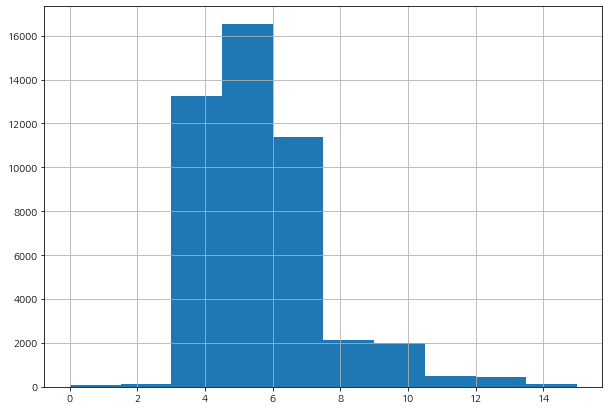

In [311]:
df_test2['전체배송기간'].hist(range=(0,15), figsize=(10,7))

In [312]:
# 전체배송기간 평균: 5.6일
df_test2['전체배송기간'].mean()

5.60172410105029

### 2. 패커스배송준비지연율 --> 재고관리가 제대로 되지 않는다는 증거!

In [313]:
count = 0
for i in range(len(df_test2['패커스배송준비기간'])):
    if df_test2['패커스배송준비기간'][i] >= 1:
        count += 1
delay_rate = count / len(df_test2['패커스배송준비기간']) * 100
delay_rate

70.2303792594494

In [314]:
# 패커스 내에서 배송을 준비하는 기간이 1일 이상인 경우가 70%으로, 이는 당일출고가 제대로 되고 있지 않음을 의미한다.

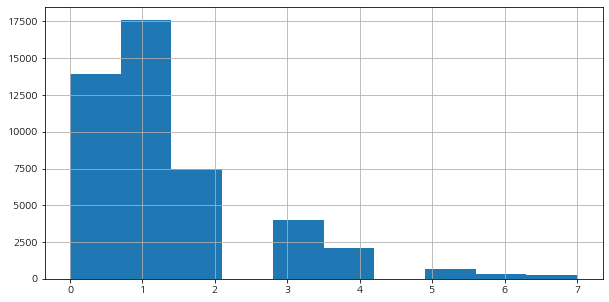

In [315]:
df_test2['패커스배송준비기간'].hist(range=(0,7), figsize=(10,5))

In [316]:
# 패커스 배송준비기간 평균: 1.4일
df_test2['패커스배송준비기간'].mean()

1.4082440266101948

In [317]:
df_test2

,Unnamed: 0,전체배송기간,패커스배송준비기간
0,0,15,11
1,1,9,5
2,2,8,4
3,3,7,3
4,4,11,7
...,...,...,...
46744,46744,4,0
46745,46745,9,5
46746,46746,12,3
46747,46747,6,3


### 3. 인기상품(중화면용기, 탕용기, 도시락용기)에 대한 인덱스 저장.

In [318]:
new_test = pd.merge(df_test, df_test2, on=['Unnamed: 0'])
new_test

,Unnamed: 0,배송시작일,배송완료일,주문일시,전체배송기간,패커스배송준비기간
0,0,2019-01-07,2019-01-11,2018-12-27,15,11
1,1,2019-01-03,2019-01-07,2018-12-29,9,5
2,2,2019-01-03,2019-01-07,2018-12-30,8,4
3,3,2019-01-03,2019-01-07,2018-12-31,7,3
4,4,2019-01-07,2019-01-11,2018-12-31,11,7
...,...,...,...,...,...,...
46744,46744,2017-12-29,2018-01-02,2017-12-29,4,0
46745,46745,2018-01-03,2018-01-07,2017-12-29,9,5
46746,46746,2018-01-02,2018-01-11,2017-12-30,12,3
46747,46747,2018-01-03,2018-01-06,2017-12-31,6,3


In [319]:
df_product = df_ship[['Unnamed: 0','상품명']]
df_product

,Unnamed: 0,상품명
0,0,195파이 탕용기 소 300개 1set(2박스)
1,1,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)"
2,2,비닐봉투 배달중 중 백색 200개
3,3,195파이 미니탕용기 투톤 300개 1set(2박스)
4,4,250파이 원형 접시 미니 블랙 400개 1박스
...,...,...
46744,46744,PP 4칸 도시락용기 A 200개 1박스
46745,46745,PP 6칸 도시락용기 02 200개 1박스
46746,46746,"170mm 수저 투명 1,500개 1박스"
46747,46747,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)


In [321]:
product = pd.merge(new_test, df_product, on='Unnamed: 0')
product

,Unnamed: 0,배송시작일,배송완료일,주문일시,전체배송기간,패커스배송준비기간,상품명
0,0,2019-01-07,2019-01-11,2018-12-27,15,11,195파이 탕용기 소 300개 1set(2박스)
1,1,2019-01-03,2019-01-07,2018-12-29,9,5,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)"
2,2,2019-01-03,2019-01-07,2018-12-30,8,4,비닐봉투 배달중 중 백색 200개
3,3,2019-01-03,2019-01-07,2018-12-31,7,3,195파이 미니탕용기 투톤 300개 1set(2박스)
4,4,2019-01-07,2019-01-11,2018-12-31,11,7,250파이 원형 접시 미니 블랙 400개 1박스
...,...,...,...,...,...,...,...
46744,46744,2017-12-29,2018-01-02,2017-12-29,4,0,PP 4칸 도시락용기 A 200개 1박스
46745,46745,2018-01-03,2018-01-07,2017-12-29,9,5,PP 6칸 도시락용기 02 200개 1박스
46746,46746,2018-01-02,2018-01-11,2017-12-30,12,3,"170mm 수저 투명 1,500개 1박스"
46747,46747,2018-01-03,2018-01-06,2017-12-31,6,3,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)


In [342]:
# 인기상품 3개에 해당하는 인덱스 저장
popular_lst = []
for i in range(len(product['상품명'])):
    if '탕용기' in product['상품명'][i]:
        popular_lst.append(product['Unnamed: 0'][i])
    elif '중화면용기' in product['상품명'][i]:
        popular_lst.append(product['Unnamed: 0'][i])
    elif '도시락용기' in product['상품명'][i]:
        popular_lst.append(product['Unnamed: 0'][i])

product_idx = product.index    
#print(product_idx)

non_popular_lst = list(set(product_idx) - set(popular_lst))
non_popular_lst

[1,
 2,
 4,
 6,
 10,
 11,
 12,
 21,
 25,
 29,
 34,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 47,
 48,
 49,
 50,
 52,
 54,
 55,
 58,
 59,
 60,
 65,
 73,
 74,
 75,
 78,
 79,
 81,
 82,
 85,
 86,
 90,
 91,
 92,
 93,
 101,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 113,
 114,
 115,
 116,
 117,
 124,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 139,
 140,
 142,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 166,
 167,
 169,
 172,
 173,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 187,
 188,
 189,
 190,
 191,
 192,
 196,
 197,
 199,
 200,
 201,
 206,
 211,
 212,
 214,
 216,
 219,
 220,
 227,
 228,
 229,
 231,
 232,
 234,
 235,
 236,
 237,
 248,
 249,
 252,
 254,
 255,
 258,
 259,
 260,
 262,
 263,
 264,
 265,
 266,
 267,
 273,
 274,
 277,
 281,
 283,
 286,
 288,
 290,
 291,
 294,
 296,
 297,
 299,
 305,
 307,
 308,
 309,
 310,
 311,
 316,
 317,
 319,
 320,
 321,
 322,
 324,
 329,
 335,
 336,
 337,
 339,
 340,
 341,
 342,
 343,
 345,
 3

In [341]:
# 인기상품 3개의 전체 주문량
print(len(popular_lst))

15670


인기상품 3개에 해당하는 인덱스가 패커스배송준비기간이 1일이상이라면, 인기상품에 대해서 재고관리가 제대로 되고 있지 않은 것이다.

In [372]:
# 인기상품 3개에 해당하면서 배송준비기간이 1일 이상인 주문건수 = 11014개.
count = 0
for i in popular_lst:
    if product['패커스배송준비기간'][i] >= 1:
        count += 1
배송지연된인기상품 = count / len(popular_lst) * 100
배송지연되지않은인기상품 = 1-배송지연된인기상품

-69.28717294192724

In [344]:
# 비인기상품에 해당하면서 배송준비기간이 1일 이상인 주문건수 =
count = 0
for i in non_popular_lst:
    if product['패커스배송준비기간'][i] >= 1:
        count += 1
ratio = count / len(non_popular_lst) * 100
ratio

70.2017439428553

In [373]:
g_group_names= ['배송지연된 인기상품','배송지연 되지않은 인기상품']
g_group_sizes = [70.2,29.8]
group_colors = ['coral','skyblue']
group_explodes = (0.1, 0)

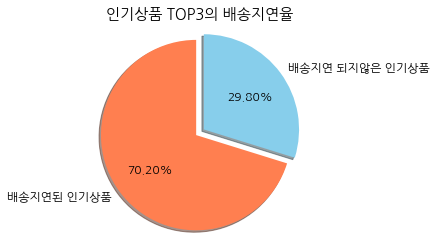

In [374]:
plt.pie(g_group_sizes,
        explode=group_explodes,
        labels=g_group_names,
        colors=group_colors,
        autopct='%1.2f%%', # second decimal place
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('인기상품 TOP3의 배송지연율', fontsize=15)
plt.show()